# 🛒 Análisis Exploratorio y Predicción de Ingresos en Supermercado Local
Estudio de ventas e ingresos en tres sucursales simuladas de un supermercado minorista (Ituzaingó, Morón y Hurlingham). Incluye visualizaciones, insights clave y predicciones mediante modelos de machine learning.


## 📥 Importación y preparación de datos

En esta sección se carga el dataset original, se traducen las columnas al español y se ajustan los valores monetarios a pesos argentinos (ARS), asumiendo un tipo de cambio de 1 USD = $1400. También se renombran las ciudades con ubicaciones locales para simular un caso realista.


In [2]:
# === 1. Cargar librerías ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# === 2. Cargar el archivo ===
df = pd.read_csv("supermarket_sales - Sheet1.csv")


In [5]:
# === 3. Cambiar nombres de ciudades por locales ===
city_mapping = {
    'Yangon': 'Ituzaingó',
    'Mandalay': 'Morón',
    'Naypyitaw': 'Hurlingham'
}
df['City'] = df['City'].replace(city_mapping)

In [6]:
# === 4. Convertir precios a pesos argentinos (USD → ARS a $1400) ===
conversion_rate = 1400
columns_to_convert = ['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross income']
for col in columns_to_convert:
    df[col] = df[col] * conversion_rate

In [7]:
# === 5. Renombrar columnas al español ===
column_translation = {
    "Invoice ID": "ID Factura",
    "Branch": "Sucursal",
    "City": "Ciudad",
    "Customer type": "Tipo de Cliente",
    "Gender": "Género",
    "Product line": "Línea de Producto",
    "Unit price": "Precio Unitario (ARS)",
    "Quantity": "Cantidad",
    "Tax 5%": "IVA (5%)",
    "Total": "Total (ARS)",
    "Date": "Fecha",
    "Time": "Hora",
    "Payment": "Medio de Pago",
    "cogs": "Costo de Venta",
    "gross margin percentage": "Margen Bruto (%)",
    "gross income": "Ingreso Bruto",
    "Rating": "Puntuación Cliente"
}
df.rename(columns=column_translation, inplace=True)

In [8]:
# === 6. Convertir la columna de fecha a tipo datetime ===
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [9]:
# === 7. Análisis exploratorio ===

# Resumen de estadísticas generales
print("Resumen general:")
print(df.describe(include='all'))

# Cantidad de valores únicos por columna
print("\nValores únicos por columna:")
print(df.nunique())

# Verificación de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

Resumen general:
         ID Factura Sucursal     Ciudad Tipo de Cliente  Género  \
count          1000     1000       1000            1000    1000   
unique         1000        3          3               2       2   
top     849-09-3807        A  Ituzaingó          Member  Female   
freq              1      340        340             501     501   
mean            NaN      NaN        NaN             NaN     NaN   
min             NaN      NaN        NaN             NaN     NaN   
25%             NaN      NaN        NaN             NaN     NaN   
50%             NaN      NaN        NaN             NaN     NaN   
75%             NaN      NaN        NaN             NaN     NaN   
max             NaN      NaN        NaN             NaN     NaN   
std             NaN      NaN        NaN             NaN     NaN   

          Línea de Producto  Precio Unitario (ARS)     Cantidad      IVA (5%)  \
count                  1000            1000.000000  1000.000000   1000.000000   
unique          

In [10]:
# === 8. Visualizaciones básicas ===
sns.set(style="whitegrid")
plt.figure(figsize=(18, 20))

<Figure size 1800x2000 with 0 Axes>

<Figure size 1800x2000 with 0 Axes>

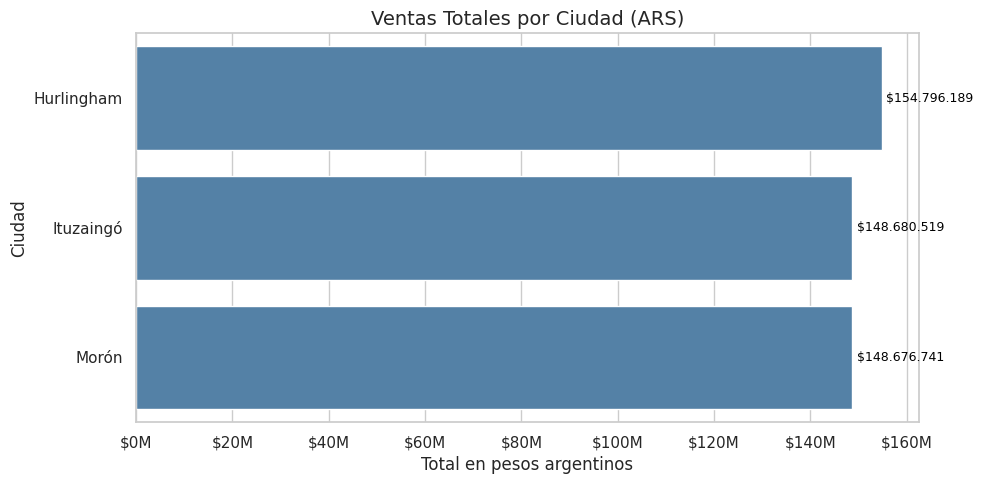

In [15]:
# 1. Ventas totales por ciudad
plt.figure(figsize=(10, 5))
ventas_ciudad = df.groupby('Ciudad')['Total (ARS)'].sum().sort_values(ascending=False)

# Crear gráfico
ax = sns.barplot(x=ventas_ciudad.values, y=ventas_ciudad.index, color='steelblue')
plt.title("Ventas Totales por Ciudad (ARS)", fontsize=14)
plt.xlabel("Total en pesos argentinos", fontsize=12)
plt.ylabel("Ciudad", fontsize=12)

# Formatear eje x con menos etiquetas y separadores más limpios
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x/1_000_000:,.0f}M".replace(",", ".")))

# Agregar etiquetas numéricas en las barras
for i, v in enumerate(ventas_ciudad.values):
    ax.text(v + 1e6, i, f"${v:,.0f}".replace(",", "."), color='black', va='center', fontsize=9)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Método de Pago')

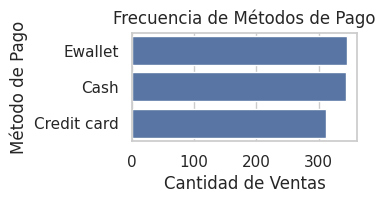

In [16]:
# 2. Distribución de métodos de pago
plt.subplot(3, 2, 2)
sns.countplot(data=df, y='Medio de Pago', order=df['Medio de Pago'].value_counts().index)
plt.title("Frecuencia de Métodos de Pago")
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Método de Pago")

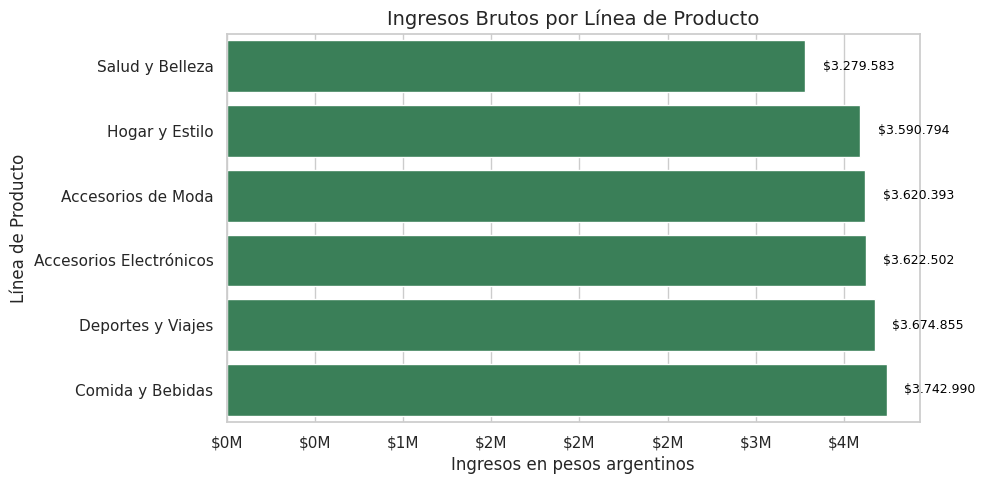

In [19]:
# 3. Ingresos brutos por línea de producto
# Mapeo de líneas de producto al español
linea_traduccion = {
    "Health and beauty": "Salud y Belleza",
    "Electronic accessories": "Accesorios Electrónicos",
    "Home and lifestyle": "Hogar y Estilo",
    "Sports and travel": "Deportes y Viajes",
    "Food and beverages": "Comida y Bebidas",
    "Fashion accessories": "Accesorios de Moda"
}

# Aplicamos la traducción en una copia para no alterar el original
df_traducido = df.copy()
df_traducido["Línea de Producto"] = df_traducido["Línea de Producto"].replace(linea_traduccion)

# Agrupamos y graficamos
plt.figure(figsize=(10, 5))
ingresos_linea = df_traducido.groupby("Línea de Producto")["Ingreso Bruto"].sum().sort_values()

ax = sns.barplot(x=ingresos_linea.values, y=ingresos_linea.index, color='seagreen')
plt.title("Ingresos Brutos por Línea de Producto", fontsize=14)
plt.xlabel("Ingresos en pesos argentinos", fontsize=12)
plt.ylabel("Línea de Producto", fontsize=12)

# Formato del eje x
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x/1_000_000:,.0f}M".replace(",", ".")))

# Etiquetas con valores exactos
for i, v in enumerate(ingresos_linea.values):
    ax.text(v + 1e5, i, f"${v:,.0f}".replace(",", "."), color='black', va='center', fontsize=9)

plt.tight_layout()
plt.show()

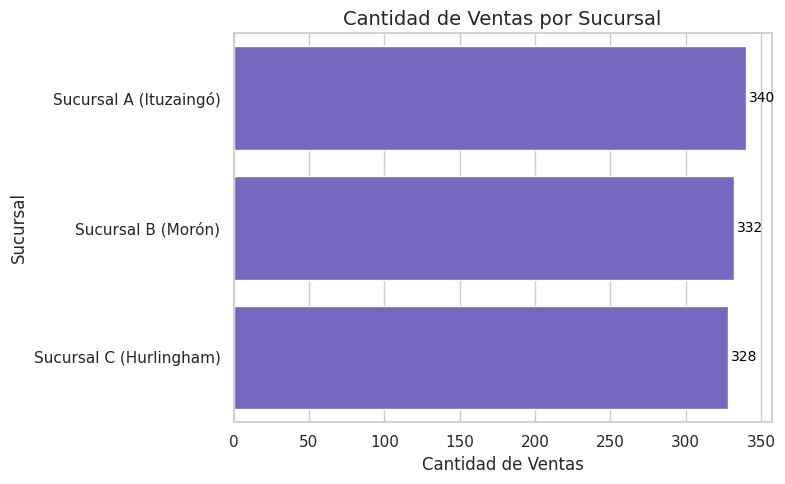

In [22]:
# 4. Cantidad de ventas por sucursal
# Agrupar por sucursal y contar cantidad de ventas
ventas_sucursal = df['Sucursal'].value_counts().sort_index()

# Asignar etiquetas personalizadas si se desea (ej: asociar cada sucursal a ciudad)
sucursal_map = {
    'A': 'Sucursal A (Ituzaingó)',
    'B': 'Sucursal B (Morón)',
    'C': 'Sucursal C (Hurlingham)'
}
ventas_sucursal.index = ventas_sucursal.index.map(sucursal_map)

# Graficar
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=ventas_sucursal.values, y=ventas_sucursal.index, color='slateblue')
plt.title("Cantidad de Ventas por Sucursal", fontsize=14)
plt.xlabel("Cantidad de Ventas", fontsize=12)
plt.ylabel("Sucursal", fontsize=12)

# Etiquetas con valores exactos
for i, v in enumerate(ventas_sucursal.values):
    ax.text(v + 2, i, f"{v:,}".replace(",", "."), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

<ipython-input-26-0329fbd9f7dc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Ciudad', y='Puntuación Cliente', palette='pastel')


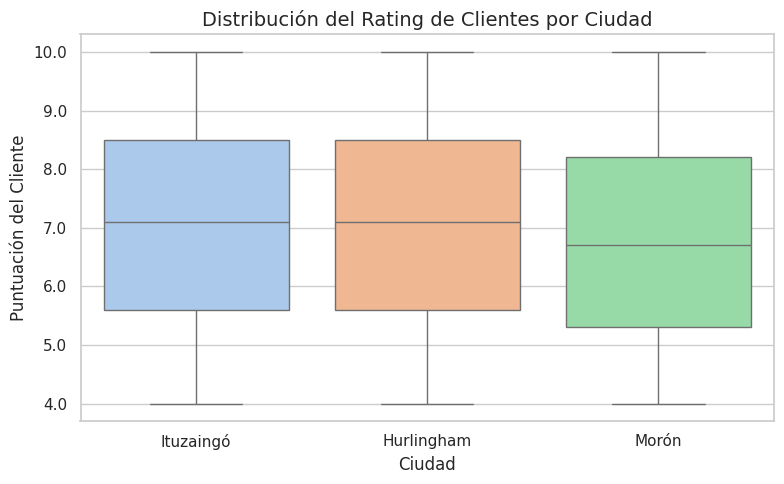

In [26]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x='Ciudad', y='Puntuación Cliente', palette='pastel')
plt.title("Distribución del Rating de Clientes por Ciudad", fontsize=14)
plt.xlabel("Ciudad", fontsize=12)
plt.ylabel("Puntuación del Cliente", fontsize=12)

# Mejoramos los valores del eje Y con formato decimal
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))

plt.tight_layout()
plt.show()

# 📊 Proyección de Ingresos Mensuales por Sucursal
Con el objetivo de dar un paso más allá del análisis histórico, vamos a realizar una proyección de ingresos para los próximos meses en cada sucursal. Esta etapa busca simular cómo evolucionarían las ventas en base al comportamiento registrado hasta ahora.

Para ello, utilizaremos los datos mensuales históricos por ciudad (Ituzaingó, Morón y Hurlingham) y aplicaremos una estrategia de predicción simple basada en el promedio histórico de ingresos, como punto de partida.

💡 Esta simulación permite anticipar la facturación esperada en cada sucursal y es una herramienta valiosa para la planificación de stock, promociones o toma de decisiones comerciales.

<Figure size 1200x600 with 0 Axes>

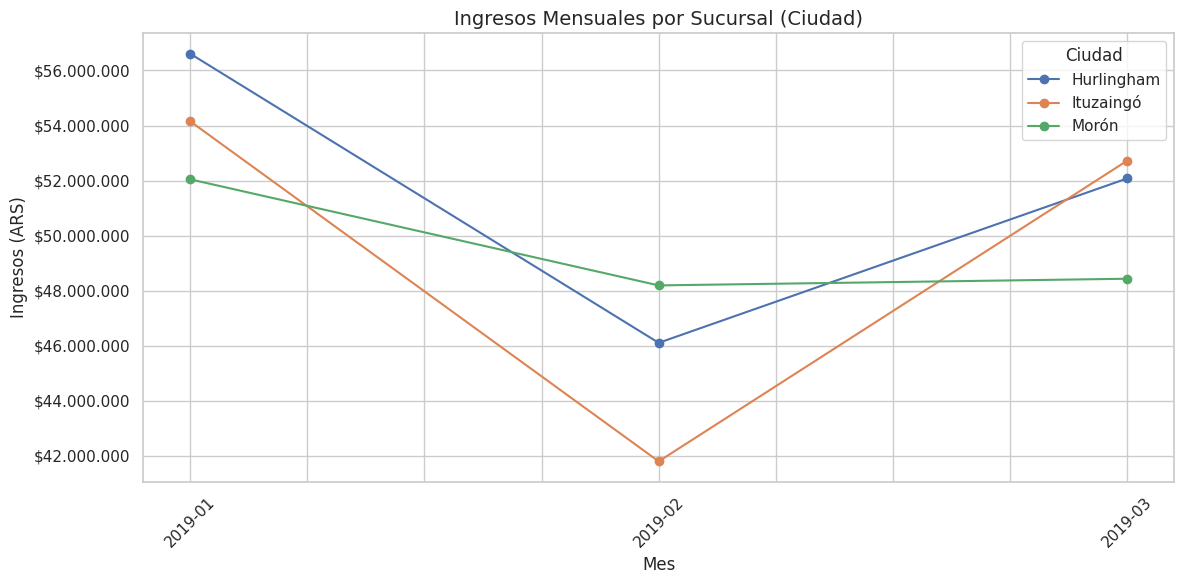

In [31]:
# Crear columna "Mes" a partir de la fecha
df["Mes"] = df["Fecha"].dt.to_period("M").astype(str)

# Agrupar por Mes y Ciudad y calcular ingresos totales
ingresos_mensuales = df.groupby(["Mes", "Ciudad"])["Total (ARS)"].sum().reset_index()

# Pivot para visualización tipo tabla (Mes vs Ciudad)
ingresos_pivot = ingresos_mensuales.pivot(index="Mes", columns="Ciudad", values="Total (ARS)")

# Graficar evolución de ingresos mensuales por ciudad
plt.figure(figsize=(12, 6))
ax = ingresos_pivot.plot(marker='o', figsize=(12, 6))
plt.title("Ingresos Mensuales por Sucursal (Ciudad)", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Ingresos (ARS)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Mejoramos formato del eje Y (pesos con separador de miles)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}".replace(",", ".")))

plt.tight_layout()
plt.show()


In [37]:
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as mtick

# === 1. Preparar los datos ===
df["Mes"] = df["Fecha"].dt.to_period("M").astype(str)
df_pred = df.groupby(["Mes", "Ciudad"])["Total (ARS)"].sum().reset_index()
df_pred["Mes_n"] = pd.to_datetime(df_pred["Mes"]).dt.strftime("%Y%m").astype(int)

# === 2. Definir meses a proyectar (formato YYYYMM) ===
meses_futuros = [201904, 201905, 201906]
modelos = {}
predicciones = []

# === 3. Entrenar modelo por ciudad y predecir ===
for ciudad in df_pred["Ciudad"].unique():
    df_ciudad = df_pred[df_pred["Ciudad"] == ciudad].copy()
    X = df_ciudad[["Mes_n"]]
    y = df_ciudad["Total (ARS)"]

    modelo = LinearRegression()
    modelo.fit(X, y)
    modelos[ciudad] = modelo

    # Predecir para los próximos 3 meses
    for mes in meses_futuros:
        X_pred = pd.DataFrame([[mes]], columns=["Mes_n"])
        ingreso_estimado = modelo.predict(X_pred)[0]
        predicciones.append({
            "Mes": pd.to_datetime(str(mes), format="%Y%m"),
            "Ciudad": ciudad,
            "Ingreso Estimado (ARS)": ingreso_estimado
        })

# === 4. Crear DataFrame de predicciones ordenado ===
df_predicciones = pd.DataFrame(predicciones).sort_values(["Ciudad", "Mes"])

# === 5. Mostrar tabla de predicciones ===
df_predicciones.head()

# Mejorar la visualización de los valores estimados con formato legible
df_predicciones_formateado = df_predicciones.copy()
df_predicciones_formateado["Ingreso Estimado (ARS)"] = df_predicciones_formateado["Ingreso Estimado (ARS)"].apply(lambda x: f"${x:,.0f}".replace(",", "."))

df_predicciones_formateado.head(9)


,Mes,Ciudad,Ingreso Estimado (ARS)
0,2019-04-01,Hurlingham,$47.068.836
1,2019-05-01,Hurlingham,$44.803.890
2,2019-06-01,Hurlingham,$42.538.943
3,2019-04-01,Ituzaingó,$48.129.363
4,2019-05-01,Ituzaingó,$47.413.958
5,2019-06-01,Ituzaingó,$46.698.553
6,2019-04-01,Morón,$45.948.711
7,2019-05-01,Morón,$44.143.610
8,2019-06-01,Morón,$42.338.509


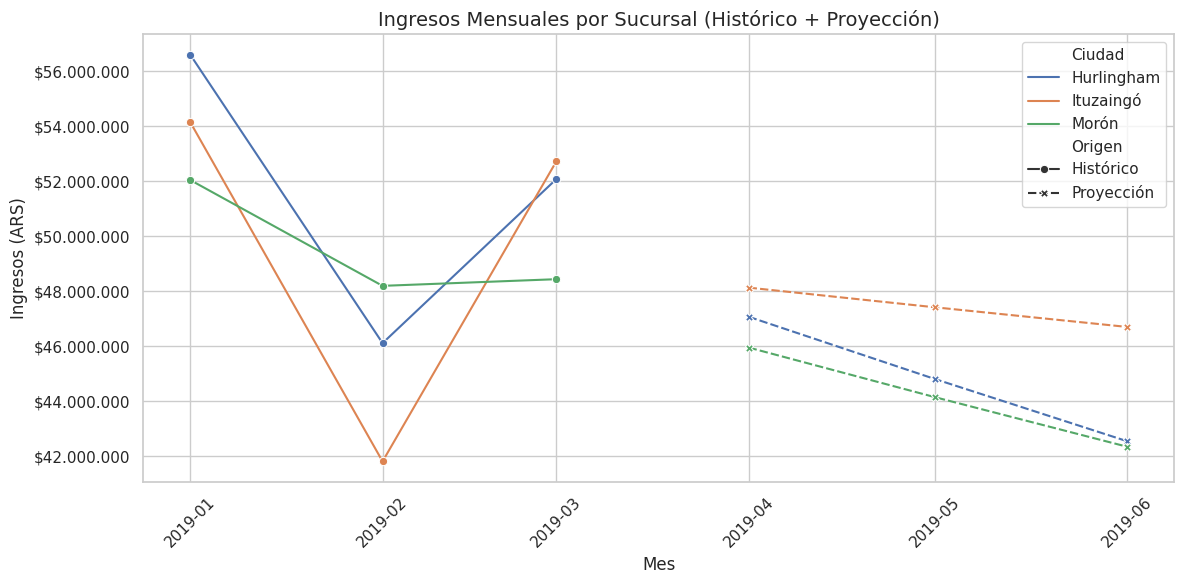

In [38]:
# Unimos ingresos reales y predichos para graficar todo junto
# Preparamos ingresos reales
ingresos_mensuales["Origen"] = "Histórico"
ingresos_mensuales["Ingreso (ARS)"] = ingresos_mensuales["Total (ARS)"]
ingresos_mensuales["Mes"] = pd.to_datetime(ingresos_mensuales["Mes"])
ingresos_mensuales = ingresos_mensuales[["Mes", "Ciudad", "Ingreso (ARS)", "Origen"]]

# Preparamos predicciones
df_predicciones["Origen"] = "Proyección"
df_predicciones.rename(columns={"Ingreso Estimado (ARS)": "Ingreso (ARS)"}, inplace=True)
df_predicciones = df_predicciones[["Mes", "Ciudad", "Ingreso (ARS)", "Origen"]]

# Concatenamos ambos
df_completo = pd.concat([ingresos_mensuales, df_predicciones])

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_completo, x="Mes", y="Ingreso (ARS)", hue="Ciudad", style="Origen", markers=True, dashes=True)
plt.title("Ingresos Mensuales por Sucursal (Histórico + Proyección)", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Ingresos (ARS)", fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}".replace(",", ".")))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## ✅ Conclusiones y aportes del proyecto

Este proyecto demuestra cómo, a partir de datos de ventas, es posible:
- Identificar insights clave con EDA.
- Visualizar comportamientos comerciales de cada ciudad.
- Predecir ingresos futuros usando ML (regresión lineal).

Este enfoque es replicable para supermercados reales o cualquier comercio que quiera profesionalizar su análisis de datos.
